# Assignment 3 - Building a Custom Visualization

---
Run the first cell below and then use the function value_checker to see where a new value lies in the plot. The function value_checker takes only one argument, the new value.
---

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# prints figures in the notebook
%matplotlib notebook

# Function to check entered value
def value_checker(new_value):
    bars = draw_fig()
    for bar in range(4):
        if (new_value > upper_limit[bar]):
            bars[bar].set_color('lightblue')
        elif (new_value <= upper_limit[bar]) & (new_value >= lower_limit[bar]):
            bars[bar].set_color('lightgray')
        else:
            bars[bar].set_color('lightcoral') 
    plt.plot([-0.5, 3.5], [new_value, new_value], color='mediumpurple', linestyle='--', linewidth=1, label='Suggested value') 
    plt.text(-0.4, new_value+200, str(new_value), color='mediumpurple')
    plt.show()
    
# function to draw figure
def draw_fig():
    fig = plt.figure()
    ax = plt.subplot(111)
    years = ['1992', '1993', '1994', '1995']
    pos = np.arange(len(years))
    values = [34484.08060666, 39975.67358697, 37565.68994977, 47798.504333]
    bars = plt.bar(pos, values, yerr=cis, align='center', facecolor='lightgreen', width = 0.9)
    plt.xticks(pos, years)
    plt.title('Average Number of Votes by Year with 95% CI')

    below_patch = mpatches.Patch(facecolor="lightblue", label='Below')
    contained_patch = mpatches.Patch(facecolor="lightgray", label='Contained')
    above_patch = mpatches.Patch(facecolor="lightcoral", linewidth=1, label='Above')
    plt.legend(handles=[above_patch, contained_patch, below_patch], loc='upper center', 
           bbox_to_anchor=(0.5, -0.05), fancybox=False, shadow=False, ncol=3)
    return bars   

# Use the following data for this assignment:
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])
df = df.transpose()

# Data cleanup
ci_92 = stats.norm.interval(0.9, loc=np.mean(df[1992]), scale=(np.std(df[1992])/np.sqrt(3650)))
ci_93 = stats.norm.interval(0.9, loc=np.mean(df[1993]), scale=(np.std(df[1993])/np.sqrt(3650)))
ci_94 = stats.norm.interval(0.9, loc=np.mean(df[1994]), scale=(np.std(df[1994])/np.sqrt(3650)))
ci_95 = stats.norm.interval(0.9, loc=np.mean(df[1995]), scale=(np.std(df[1995])/np.sqrt(3650)))
cis = [ci_92[1]-ci_92[0], ci_93[1]-ci_93[0], ci_94[1]-ci_94[0], ci_95[1]-ci_95[0]]
means = df.mean()
values = [34484.08060666, 39975.67358697, 37565.68994977, 47798.504333]
upper_limit = np.array(values)+np.array(cis) 
lower_limit = np.array(values)-np.array(cis) 

<IPython.core.display.Javascript object>


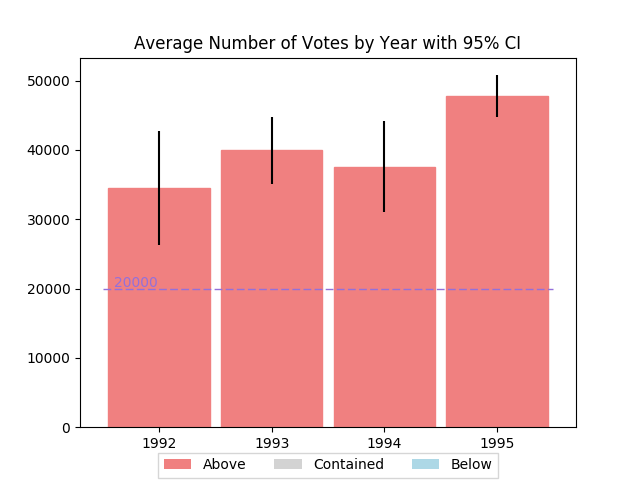

In [11]:
value_checker(20000)

<IPython.core.display.Javascript object>


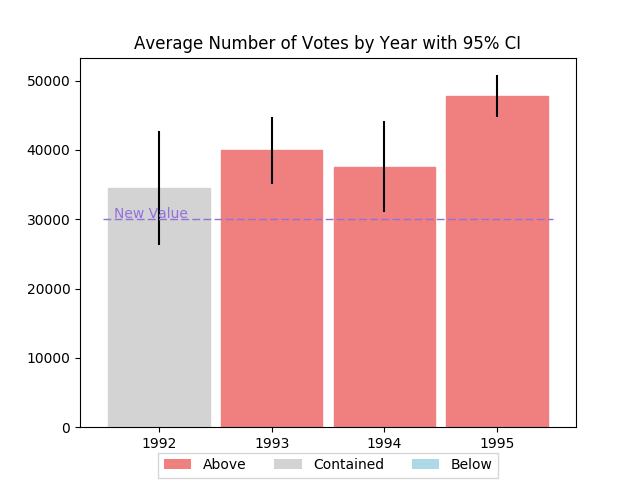

In [4]:
value_checker(30000)

<IPython.core.display.Javascript object>


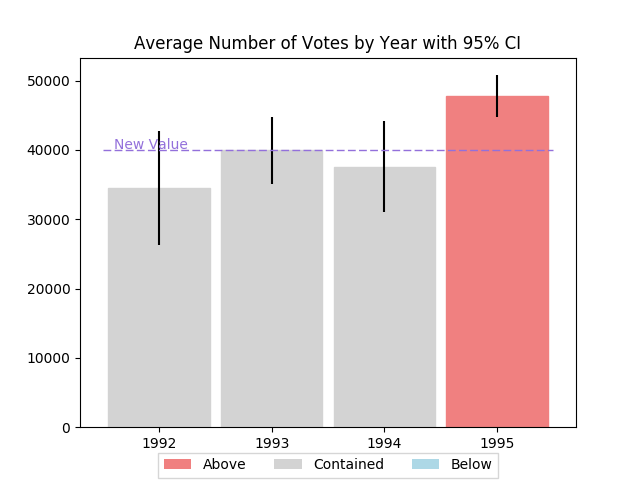

In [5]:
value_checker(40000)

<IPython.core.display.Javascript object>


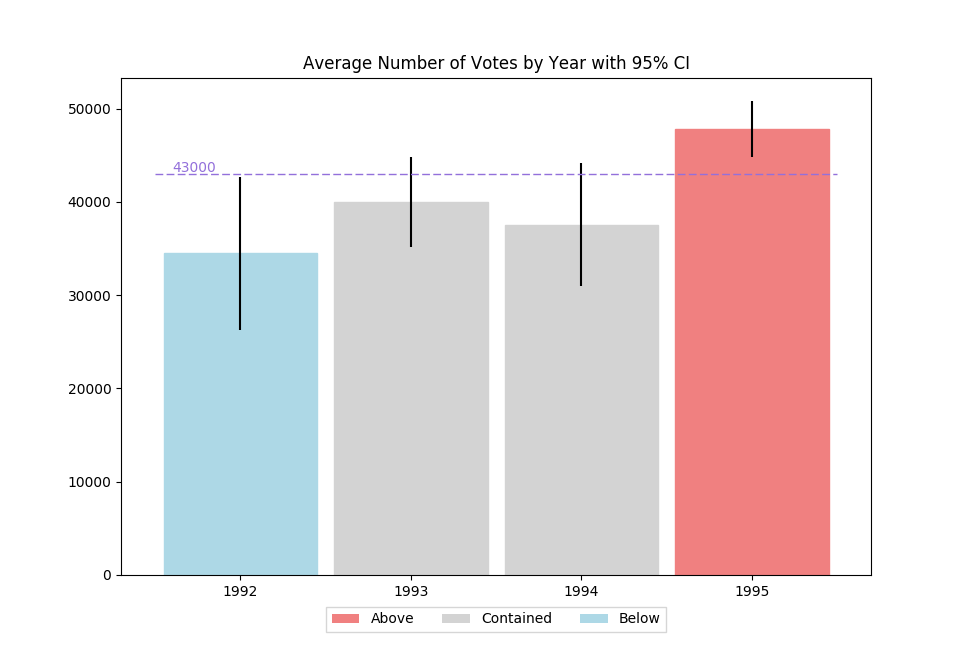

In [13]:
value_checker(43000)

<IPython.core.display.Javascript object>


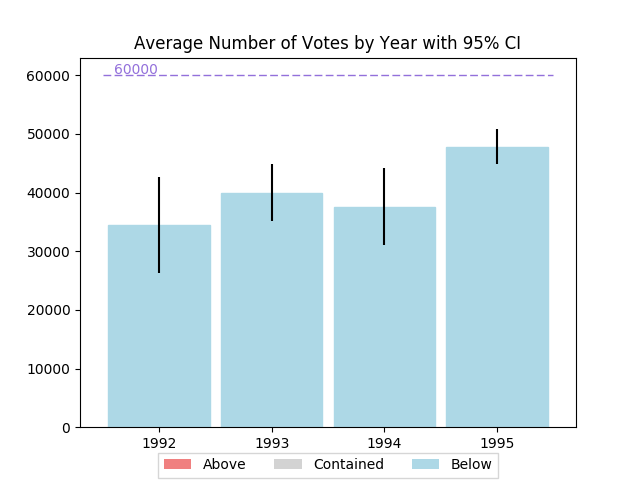

In [12]:
value_checker(60000)